# Boosting classifier: Data Preprocessing, Model Implementation, Parameter Tuning, and Evaluation

In [ ]:
# Import the necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
file_path = 'training_data.csv'
data = pd.read_csv(file_path)

# Inspect the header of the dataset
data.head()

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.0,0,0.0,16.3,31.6,16.0,low_bike_demand
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.0,0,0.0,23.9,85.7,16.0,low_bike_demand
2,21,3,8,0,1,1,26.9,21.8,73.39,0.0,0,0.0,0.0,81.1,16.0,low_bike_demand
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.0,0,0.0,19.2,0.0,16.0,low_bike_demand
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.0,0,0.0,10.5,44.6,16.0,low_bike_demand


In [ ]:
# Identifying categorical and numerical variables
categorical = data.columns.tolist()
numerical = data.columns.tolist()

# Assuming the target variable is the last column
target_var = data.columns[-1]

print('Categorical Variables:', categorical)
print('Numerical Variables:', numerical)
print('Target Variable:', target_var)


Categorical Variables: ['hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday', 'summertime', 'temp', 'dew', 'humidity', 'precip', 'snow', 'snowdepth', 'windspeed', 'cloudcover', 'visibility', 'increase_stock']
Numerical Variables: ['hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday', 'summertime', 'temp', 'dew', 'humidity', 'precip', 'snow', 'snowdepth', 'windspeed', 'cloudcover', 'visibility', 'increase_stock']
Target Variable: increase_stock


In [ ]:
# Encode the categorical target variable
label_encoder = LabelEncoder()
data['increase_stock'] = label_encoder.fit_transform(data['increase_stock'])
data.head()

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.0,0,0.0,16.3,31.6,16.0,1
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.0,0,0.0,23.9,85.7,16.0,1
2,21,3,8,0,1,1,26.9,21.8,73.39,0.0,0,0.0,0.0,81.1,16.0,1
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.0,0,0.0,19.2,0.0,16.0,1
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.0,0,0.0,10.5,44.6,16.0,1


In [ ]:
# Splitting the dataset into features (X) and target variable (y)
X = data.drop('increase_stock', axis=1)
y = data['increase_stock']

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Model Implementation: Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

In [ ]:
# Parameters for
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

In [ ]:
# Grid Search for parameter tuning and find best parameters
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [ ]:
# Train the model with the best parameters
best_gb_classifier = GradientBoostingClassifier(**best_params, random_state=42)
best_gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Predictions and Evaluation
y_pred = best_gb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
# recall = recall_score(y_test, y_pred)
# print(recall)

In [ ]:
# Calculate and print recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# Calculate and print F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1}")

Recall: 0.9333333333333333
F1-Score: 0.9316081330868762


In [ ]:
# Print the result
print("Best Parameters:", best_params)
print("Accuracy on Test Set:", accuracy)
print("Classification Report:\n", report)
print("")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Accuracy on Test Set: 0.884375
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.62      0.63        50
           1       0.93      0.93      0.93       270

    accuracy                           0.88       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.88      0.88      0.88       320




Cross-validation scores: [0.921875   0.88671875 0.8984375  0.88671875 0.9140625 ]
Mean cross-validation score: 0.9015625


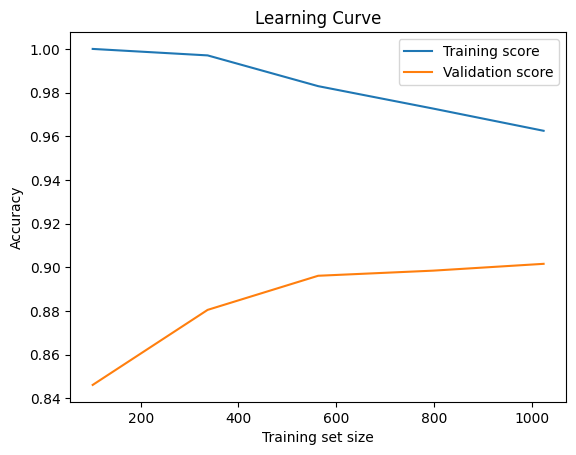

In [ ]:
# Initialize the model with the best parameters found previously
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(gb_classifier, X_train, y_train, cv=5)

# Check cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

# Fit the model on the training data
gb_classifier.fit(X_train, y_train)

# Evaluate on the training set
train_score = gb_classifier.score(X_train, y_train)

# Evaluate on the test set
test_score = gb_classifier.score(X_test, y_test)

# Plot learning curve
train_sizes, train_scores, validation_scores = learning_curve(
    gb_classifier, X_train, y_train, train_sizes=[0.1, 0.33, 0.55, 0.78, 1.0], cv=5
)
train_scores_mean = train_scores.mean(axis=1)
validation_scores_mean = validation_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, validation_scores_mean, label='Validation score')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

# Randomized Search (Hyperparameter Tuning)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter grid
param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10)
}

# Initialize the model
gb_classifier = GradientBoostingClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(gb_classifier, param_distributions=param_dist,
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters
best_params_random = random_search.best_params_
print("Best Parameters:", best_params_random)

# Train the model with the best parameters found
best_gb_classifier = GradientBoostingClassifier(**best_params_random, random_state=42)
best_gb_classifier.fit(X_train, y_train)

# Evaluate the model
y_pred = best_gb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation results
print("Accuracy on Test Set:", accuracy)
print("Classification Report:\n", report)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'learning_rate': 0.013615072723104174, 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 9, 'n_estimators': 483}
Accuracy on Test Set: 0.875
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.58      0.59        50
           1       0.92      0.93      0.93       270

    accuracy                           0.88       320
   macro avg       0.76      0.75      0.76       320
weighted avg       0.87      0.88      0.87       320



# SMOTE - Synthetic Minority Over-sampling Technique

In [ ]:
from imblearn.over_sampling import SMOTE

# Load the dataset
file_path = 'training_data.csv'
data = pd.read_csv(file_path)

# Encode the categorical target variable
label_encoder = LabelEncoder()
data['increase_stock'] = label_encoder.fit_transform(data['increase_stock'])

# Splitting the dataset into features and target variable
X = data.drop('increase_stock', axis=1)
y = data['increase_stock']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train_smote, y_train_smote)

# Predictions and Evaluation
y_pred = gb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the result
print("Accuracy on Test Set:", accuracy)
print("Classification Report:\n", report)


Accuracy on Test Set: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.74      0.61        50
           1       0.95      0.87      0.91       270

    accuracy                           0.85       320
   macro avg       0.73      0.81      0.76       320
weighted avg       0.88      0.85      0.86       320



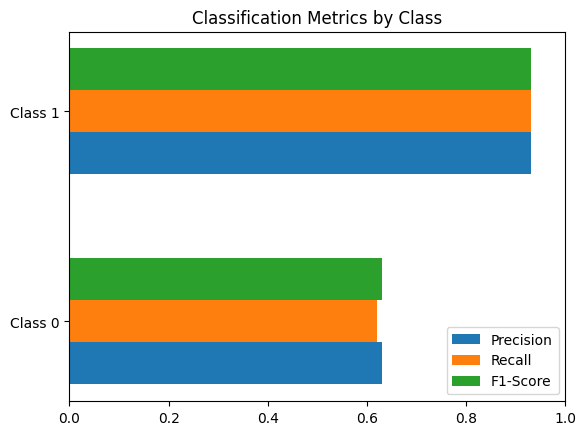

In [ ]:
import matplotlib.pyplot as plt

# Assuming these are your classification report results
metrics = {
    'Precision': [0.63, 0.93],
    'Recall': [0.62, 0.93],
    'F1-Score': [0.63, 0.93]
}
classes = ['Class 0', 'Class 1']

# Creating a bar plot for each class
fig, ax = plt.subplots()
for i, metric in enumerate(metrics):
    ax.barh([p + i * 0.2 for p in range(len(classes))], metrics[metric], height=0.2, label=f'{metric}')

# Setting the y-ticks to the middle of the group bars
ax.set_yticks([p + 0.2 for p in range(len(classes))])
ax.set_yticklabels(classes)
ax.set_xlim(0, 1)

# Adding the legend and title
plt.legend()
plt.title('Classification Metrics by Class')
plt.show()


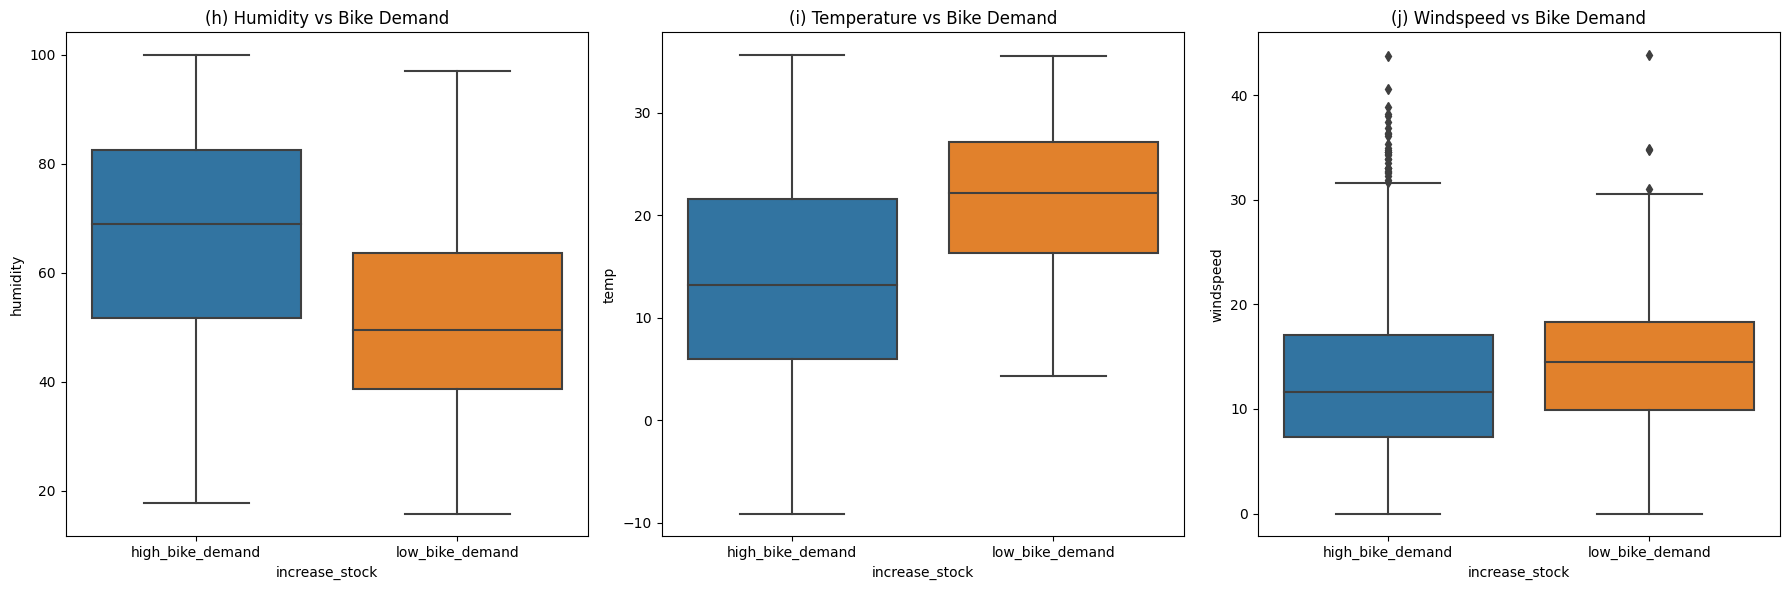

In [ ]:
# Mapping the encoded values to the labels
data['increase_stock'] = data['increase_stock'].map({0: 'low_bike_demand', 1: 'high_bike_demand'})

# Create a figure to hold the subplots
plt.figure(figsize=(18, 6))

# Plot 'humidity' vs 'increase_stock'
plt.subplot(1, 3, 1)
sns.boxplot(x='increase_stock', y='humidity', data=data)
plt.title('(h) Humidity vs Bike Demand')

# Plot 'temp' vs 'increase_stock'
plt.subplot(1, 3, 2)
sns.boxplot(x='increase_stock', y='temp', data=data)
plt.title('(i) Temperature vs Bike Demand')

# Plot 'windspeed' vs 'increase_stock'
plt.subplot(1, 3, 3)
sns.boxplot(x='increase_stock', y='windspeed', data=data)
plt.title('(j) Windspeed vs Bike Demand')

# Show the plot
plt.tight_layout()
plt.show()

# Model Prediction

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
import joblib

# Load the trained Gradient Boosting Classifier model
# Replace 'best_gb_classifier.pkl' with the full path to your trained model file
model_path = 'best_gb_classifier.pkl'
best_gb_classifier = joblib.load(model_path)

# Load the test data
# Replace 'test_data.csv' with the full path to your test data file
test_data_path = 'test_data.csv'
test_data = pd.read_csv(test_data_path)

# Assuming that the test data needs to be standardized using the same scaler used on the training data
# Replace 'scaler.pkl' with the full path to your scaler file
scaler_path = 'scaler.pkl'
scaler = joblib.load(scaler_path)

# Scale the test data
X_test_scaled = scaler.transform(test_data)

# Generate predictions
predictions = best_gb_classifier.predict(X_test_scaled)

# Convert predictions to the required format (a single row of comma-separated values)
predictions_str = ','.join(map(str, predictions))

# Write the predictions to a CSV file
# This file will have a single line with no header
output_file_path = 'predictions.csv'  # The output file path
with open(output_file_path, 'w') as f:
    f.write(predictions_str)

print(f"Predictions have been written to {output_file_path}")